<a href="https://colab.research.google.com/github/valsson-group/UNT-ChemicalApplicationsOfMachineLearning-Spring2026/blob/main/Examples_NumPy/Dataset_Filtering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset filtering

Here we show an example of filtering a dataset using numpy logical masks

### 1D Dataset

In [1]:
%%capture
# download datasets
!wget https://raw.githubusercontent.com/valsson-group/UNT-ChemicalApplicationsOfMachineLearning-Spring2026/refs/heads/main/Lecture-1_January-13-2026/Dataset_1D-TimeSeries_Set-1.data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = np.loadtxt("Dataset_1D-TimeSeries_Set-1.data")
time = data[:,0]
values = data[:,1]

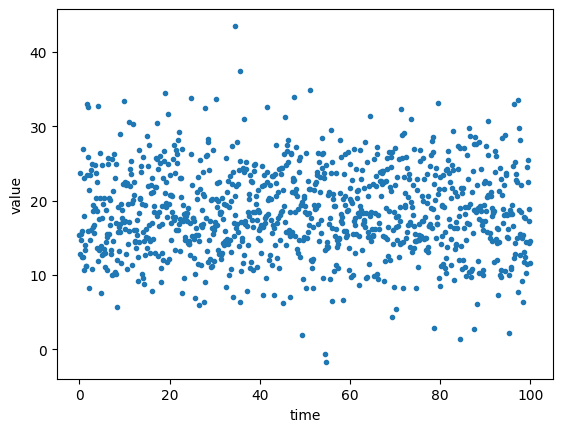

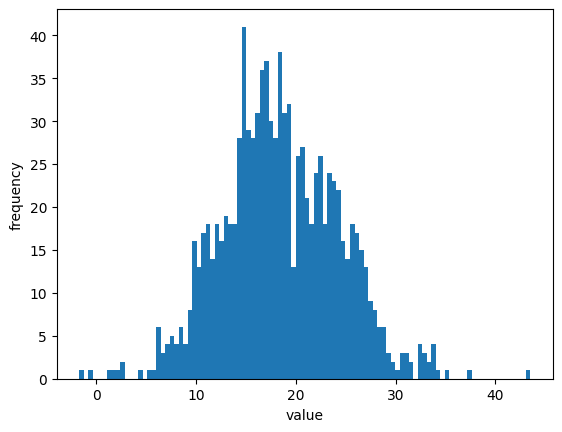

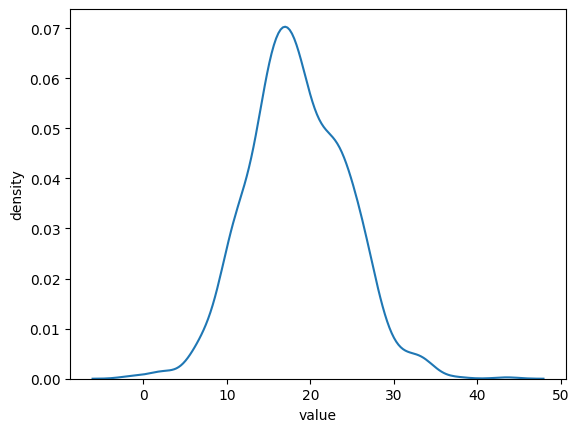

In [4]:
plt.plot(time,values,'.')
plt.xlabel("time")
plt.ylabel("value")
plt.show()

plt.hist(values,bins=100)
plt.xlabel("value")
plt.ylabel("frequency")
plt.show()

sns.kdeplot(values)
plt.xlabel("value")
plt.ylabel("density")
plt.show()

In [5]:
# here we use the np.percentile function to find
# 10-th percentile and 90-th percentile of the
# dataset

values_percentile_10 = np.percentile(values,10)
values_percentile_90 = np.percentile(values,90)


print(values_percentile_10)
print(values_percentile_90)

11.0447160954
26.0076852345


In [6]:
# we now create a numpy logical mask to select the elements that are
# within 10% of 90% of the data (that is excluding the lowest 10% and
# highest 10% values of the data)
#
# (values > values_percentile_10) selects values that are higher than values_percentile_10
# (values < values_percentile_90) selects values that are lower than values_percentile_90
# the "&" is a boolean AND operator to select elements that fulfil both.
mask_10_to_90 = (values > values_percentile_10) & (values < values_percentile_90)

values_filtered = values[mask_10_to_90]
# the "~" is a boolean NOT operator
values_filtered_out = values[~mask_10_to_90]

print("values.size:",values.size)
print("values_filtered.size",values_filtered.size)
print("values_filtered_out",values_filtered_out.size)



values.size: 1001
values_filtered.size 799
values_filtered_out 202


In [7]:
# This does the exact same as the previous cell but uses the np.logical_and()
# and np.logical_not() functions.

mask_10_to_90 =np.logical_and( (values > values_percentile_10), (values < values_percentile_90))

values_filtered = values[mask_10_to_90]
values_filtered_out = values[np.logical_not(mask_10_to_90)]

print("values.size:",values.size)
print("values_filtered.size",values_filtered.size)
print("values_filtered_out",values_filtered_out.size)


values.size: 1001
values_filtered.size 799
values_filtered_out 202


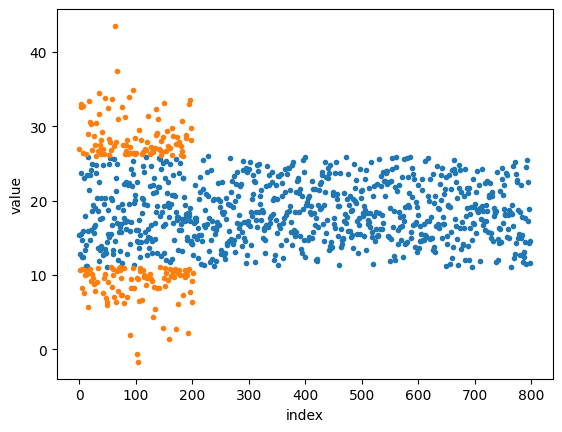

In [8]:
# plot the data, this will not look correctly as we only
# pass the values to the plot function so that the
# x-axis is in the index of the element
plt.plot(values_filtered,'.',label="filtered")
plt.plot(values_filtered_out,'.',label="filtered out")
plt.xlabel("index")
plt.ylabel("value")
plt.show()

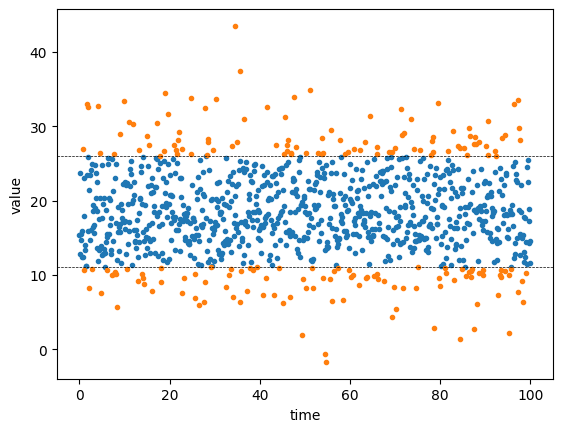

In [9]:
# Here we make the plot correctly by passing the time array,
# but we need to filter that array also to get it looking correctly
plt.plot(time[mask_10_to_90],values_filtered,'.',label="filtered")
plt.plot(time[~mask_10_to_90],values_filtered_out,'.',label="filtered out")
plt.xlabel("time")
plt.ylabel("value")

# This is to plot horizontal lines for the boundary at 10% and 90%
# using axhline. Here we will need to use the plt.gca() to get the
# axis object for the plot
ax = plt.gca()
ax.axhline(y=values_percentile_10, color='black', linestyle='--', linewidth=0.5)
ax.axhline(y=values_percentile_90, color='black', linestyle='--', linewidth=0.5)
plt.show()

plt.show()

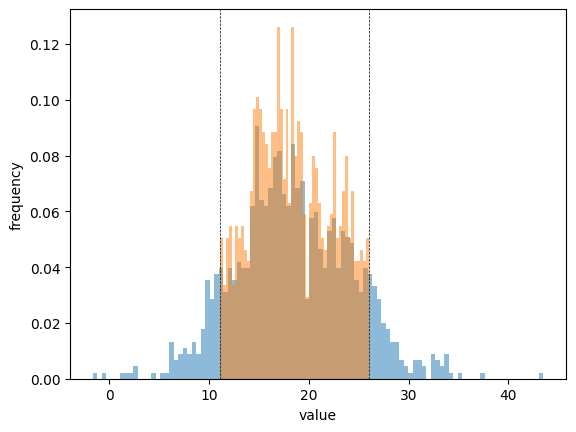

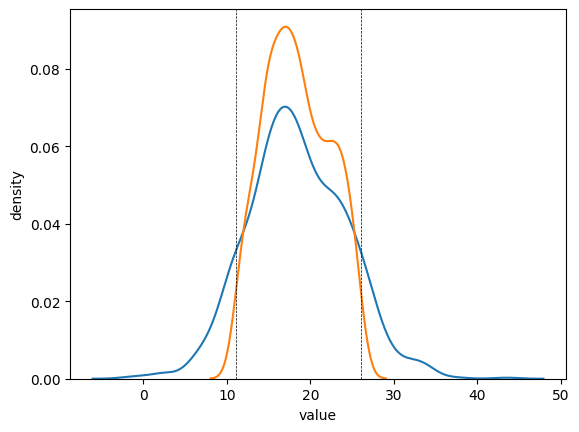

In [10]:
# make plots that shows the filtering

plt.hist(values,bins=100,label="Full set",density=True, alpha=0.5)
plt.hist(values_filtered,bins=50,label="Filtered set",density=True, alpha=0.5)
plt.xlabel("value")
plt.ylabel("frequency")
# This is to plot vertical lines for the boundary at 10% and 90%
# using axvline. Here we will need to use the plt.gca() to get the
# axis object for the plot
ax = plt.gca()
ax.axvline(x=values_percentile_10, color='black', linestyle='--', linewidth=0.5)
ax.axvline(x=values_percentile_90, color='black', linestyle='--', linewidth=0.5)
plt.show()

# note that the KDE plot will "leak" outside the boundry
# lines as the KDE employs finite width Gaussian kernels
sns.kdeplot(values,label="Full set")
sns.kdeplot(values_filtered,label="Filtered set")
plt.xlabel("value")
plt.ylabel("density")
ax = plt.gca()
ax.axvline(x=values_percentile_10, color='black', linestyle='--', linewidth=0.5)
ax.axvline(x=values_percentile_90, color='black', linestyle='--', linewidth=0.5)
plt.show()


### 2D Dataset

In [11]:
%%capture
!wget https://raw.githubusercontent.com/valsson-group/UNT-ChemicalApplicationsOfMachineLearning-Spring2026/refs/heads/main/Lecture-1_January-13-2026/Dataset_2D-TimeSeries.data

In [12]:
data_2D = np.loadtxt("Dataset_2D-TimeSeries.data")
print(data_2D.shape)

time_2D = data_2D[:,0]
x_values = data_2D[:,1]
y_values = data_2D[:,2]

(20001, 3)


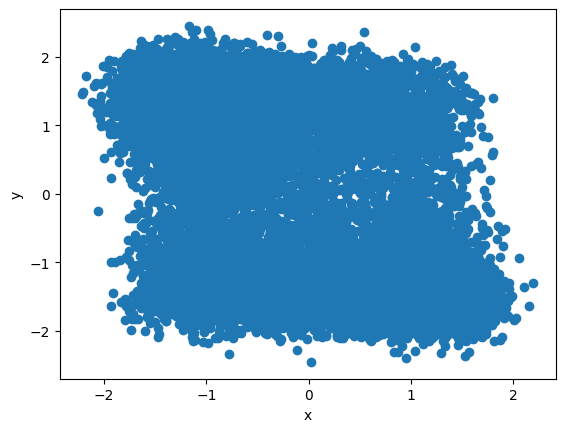

In [13]:
plt.scatter(x_values,y_values)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [14]:
# creata numpy logical masks

x_p10 = np.percentile(x_values,10)
x_p90 = np.percentile(x_values,90)

y_p10 = np.percentile(y_values,10)
y_p90 = np.percentile(y_values,90)

# create masks for x and y seperatly
mask_x = np.logical_and( (x_values < x_p90), (x_values > x_p10))
mask_y = np.logical_and( (y_values < y_p90), (y_values > y_p10))

# define the common mask for both x and y,
# so this will be a mask for elements that are
# within the 10%-90% range for both x and y.
mask_xy_common = np.logical_and(mask_x,mask_y)

print("np.sum(mask_x):",np.sum(mask_x))
print("np.sum(mask_y):",np.sum(mask_y))
print("np.sum(mask_xy_common):",np.sum(mask_xy_common))

np.sum(mask_x): 15999
np.sum(mask_y): 15999
np.sum(mask_xy_common): 12988


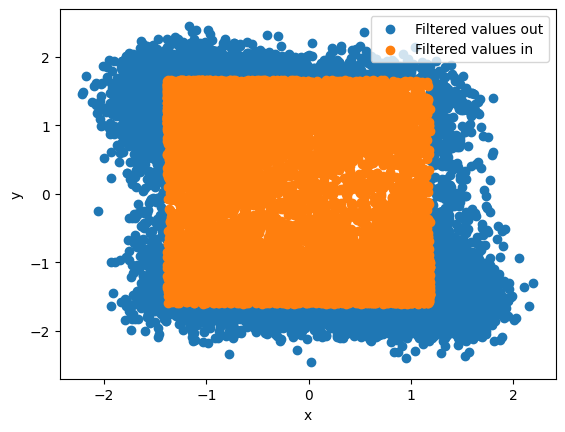

In [15]:
# plot a scatter plot for the filtered data.
plt.scatter(x_values[~mask_xy_common],y_values[~mask_xy_common],label="Filtered values out")
plt.scatter(x_values[mask_xy_common],y_values[mask_xy_common],label="Filtered values in")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()